In [24]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [51]:
#import the dataset
data = pd.read_excel("Beverages_Sales.xlsx",sheet_name="Data")

# 1. Understand the Data

In [29]:
data.shape

(30221, 11)

In [31]:
data.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30221 entries, 0 to 30220
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       30221 non-null  object 
 1   Customer_ID    30221 non-null  object 
 2   Customer_Type  30221 non-null  object 
 3   Product        30221 non-null  object 
 4   Category       30221 non-null  object 
 5   Unit_Price     30221 non-null  float64
 6   Quantity       30221 non-null  int64  
 7   Discount       30221 non-null  float64
 8   Total_Price    30221 non-null  float64
 9   Region         30221 non-null  object 
 10  Order_Date     30221 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 2.5+ MB


In [35]:
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD36,CUS2732,B2B,Riesling,Alcoholic Beverages,7.46,17,0.1,114.14,Mecklenburg-Vorpommern,44928
1,ORD81,CUS6826,B2C,Bacardi,Alcoholic Beverages,14.26,3,0.0,42.78,Schleswig-Holstein,44927
2,ORD81,CUS6826,B2C,Fanta,Soft Drinks,1.23,12,0.0,14.76,Schleswig-Holstein,44927
3,ORD81,CUS6826,B2C,Mango Juice,Juices,3.31,12,0.0,39.72,Schleswig-Holstein,44927
4,ORD139,CUS7240,B2C,Evian,Water,1.31,9,0.0,11.79,Bayern,44938


In [37]:
data.describe()

,Unit_Price,Quantity,Discount,Total_Price,Order_Date
count,30221.000000,30221.000000,30221.000000,30221.000000,30221.000000
mean,6.061129,23.281493,0.029984,135.413922,44942.085272
std,15.253405,26.904310,0.044833,509.890204,8.956648
min,0.340000,1.000000,0.000000,0.350000,44927.000000
25%,1.080000,6.000000,0.000000,8.800000,44934.000000
50%,1.860000,11.000000,0.000000,21.970000,44942.000000
75%,3.310000,31.000000,0.050000,72.720000,44950.000000
max,140.780000,100.000000,0.150000,11128.660000,44957.000000


# 2. Analyse the data

In [53]:
data.drop(columns=["Order_Date","Order_ID","Customer_ID"],inplace=True)
data.rename(columns={'Customer_Type':'Customer Type','Unit_Price':'Unit Price',
                     'Total_Price':'Total Price','Region':'State'},inplace=True)

In [102]:
region_map = {
    "Hamburg": "North",
    "Niedersachsen": "North",
    "Schleswig-Holstein": "North",
    "Mecklenburg-Vorpommern": "North",
    "Bremen": "North",

    "Berlin": "East",
    "Brandenburg": "East",
    "Sachsen": "East",
    "Sachsen-Anhalt": "East",
    "Thüringen": "East",

    "Bayern": "South",
    "Baden-Württemberg": "South",

    "Nordrhein-Westfalen": "West",
    "Rheinland-Pfalz": "West",
    "Saarland": "West",
    "Hessen": "West"
}

data["Region"] = data["State"].map(region_map)


<Axes: xlabel='Region'>

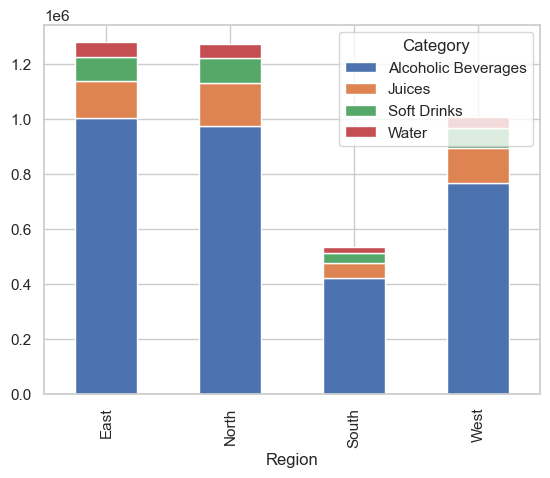

In [397]:
data.groupby(["Region", "Category"])["Total Price"].sum().unstack().plot(kind="bar", stacked=True)

<Figure size 800x500 with 0 Axes>

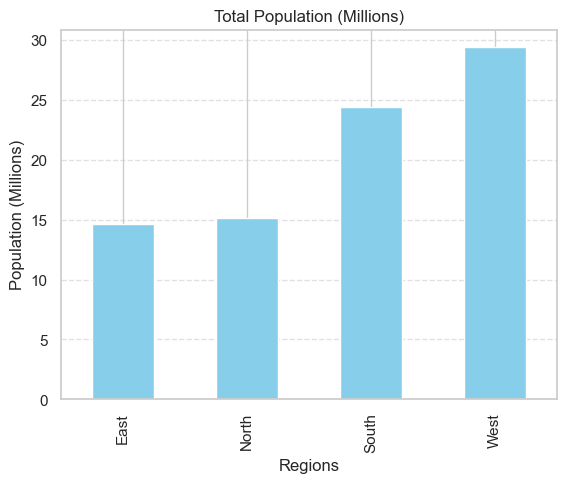

In [305]:
#Extracted Population data in millions approx. as of 2022/2023
population_data = {
    "Region": ["East", "North", "South", "West"],
    "Total Population": [14.61, 15.14, 24.40, 29.38]
}
df_pop = pd.DataFrame(population_data)
df_pop.set_index("Region", inplace=True)
plt.figure(figsize=(8, 5))
df_pop.plot(kind="bar", color="skyblue",legend=False)
plt.title("Total Population (Millions)")
plt.xlabel("Regions")
plt.ylabel("Population (Millions)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [176]:
data.groupby("Region")["Total Price"].sum()

Region
East     1278504.64
North    1271643.97
South     534007.44
West     1008188.08
Name: Total Price, dtype: float64

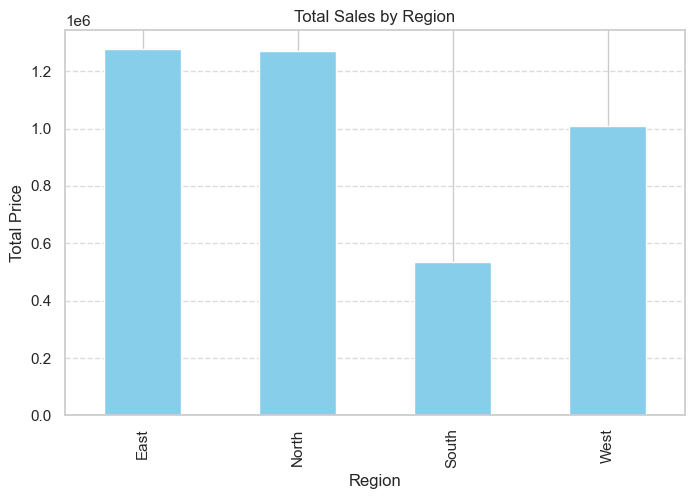

In [297]:
# Group and sum
region_sales = data.groupby("Region")["Total Price"].sum()

# Plot
plt.figure(figsize=(8, 5))
region_sales.plot(kind="bar", color="skyblue")

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Price")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [345]:
top5_per_category = (
    data.groupby(["Category", "Product"])["Total Price"].sum().reset_index().sort_values(["Category", "Total Price"], ascending=[True, False])
    .groupby("Category").head(5).reset_index(drop=True)
)

print(top5_per_category)


               Category              Product  Total Price
0   Alcoholic Beverages       Veuve Clicquot    666105.78
1   Alcoholic Beverages       Moët & Chandon    599315.56
2   Alcoholic Beverages       Johnnie Walker    346142.34
3   Alcoholic Beverages         Jack Daniels    336992.74
4   Alcoholic Beverages            Tanqueray    313352.76
5                Juices      Cranberry Juice     81963.67
6                Juices          Mango Juice     77383.92
7                Juices  Passion Fruit Juice     75964.78
8                Juices         Tomato Juice     68739.93
9                Juices   Rauch Multivitamin     62930.02
10          Soft Drinks           Fritz-Kola     40832.09
11          Soft Drinks              Monster     40737.09
12          Soft Drinks             Red Bull     34928.23
13          Soft Drinks             Rockstar     33324.87
14          Soft Drinks            Club Mate     25530.11
15                Water           Vio Wasser     25862.11
16            

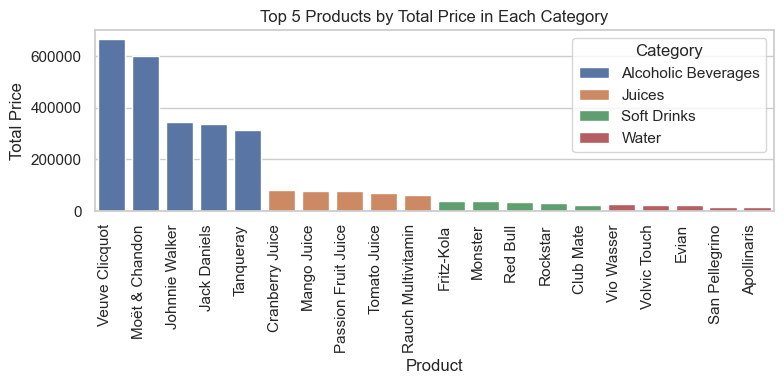

In [385]:

plt.figure(figsize=(8, 4))
sns.barplot(data=top5_per_category, x="Product", y="Total Price", hue="Category")
plt.title("Top 5 Products by Total Price in Each Category")
plt.xlabel("Product")
plt.ylabel("Total Price")
plt.xticks(rotation=90, ha='right')
plt.legend(title="Category", loc="upper right")
plt.tight_layout()
plt.show()


In [401]:
top10 = data.groupby(["Category","Product"])["Total Price"].sum().sort_values(ascending=False).reset_index().head(10)
print(top10)

              Category          Product  Total Price
0  Alcoholic Beverages   Veuve Clicquot    666105.78
1  Alcoholic Beverages   Moët & Chandon    599315.56
2  Alcoholic Beverages   Johnnie Walker    346142.34
3  Alcoholic Beverages     Jack Daniels    336992.74
4  Alcoholic Beverages        Tanqueray    313352.76
5  Alcoholic Beverages      Havana Club    212254.93
6  Alcoholic Beverages          Bacardi    208033.60
7  Alcoholic Beverages  Sauvignon Blanc     86551.74
8  Alcoholic Beverages         Riesling     82028.90
9               Juices  Cranberry Juice     81963.67


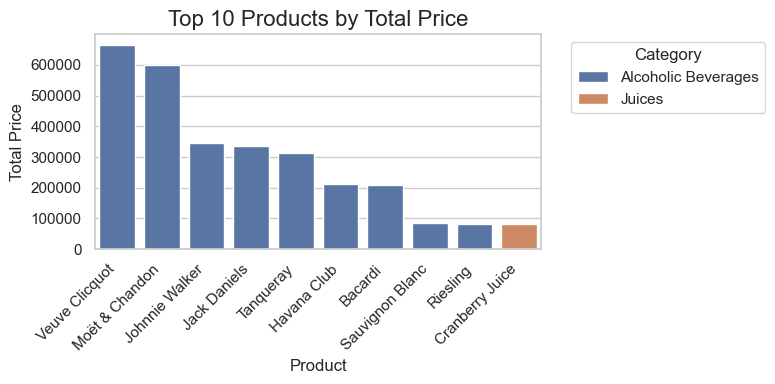

In [369]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top10, x="Product", y="Total Price", hue="Category")
plt.title("Top 10 Products by Total Price", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Price", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()